In [12]:
# import libraries
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [13]:
# load the news data and visualize it
df = pd.read_csv('news.csv')
print(f'Shape of the news data: {df.shape}')
df.head()

Shape of the news data: (6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [15]:
# initialize TfidfVectorizer with English stop words and a max doc frequency
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [16]:
# initialize a PassiveAgressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100)}%')

Accuracy: 94%


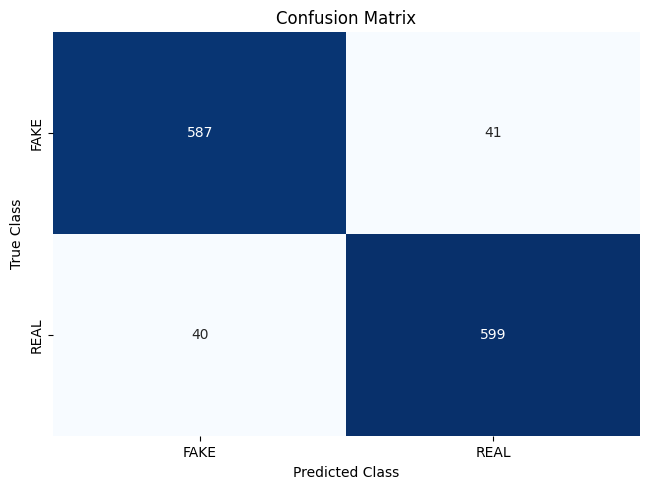

In [17]:
# view the model's confusion matrix
class_names = ['FAKE', 'REAL']
matrix = confusion_matrix(y_test, y_pred, labels=class_names)
confusion_df = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(confusion_df, annot=True, cbar=None, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [39]:
# evaluate model performance
from sklearn.metrics import f1_score, recall_score

f1_score = round(f1_score(y_test, y_pred, pos_label='FAKE'), 2)
recall_score = round(recall_score(y_test, y_pred, pos_label='FAKE'), 2)
print(f'Sensitivity/Recall for the model: {recall_score}')
print(f'F1 Score for the model: {f1_score}')

Sensitivity/Recall for the model: 0.93
F1 Score for the model: 0.94
